In [21]:
import pandas as pd
import numpy as np
import os

#visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline

In [3]:
training_data_folder = "Data/Iterative-models-building/Training data/Conventions/"

In [4]:
training_data_files = [f for f in os.listdir(training_data_folder) 
                              if (os.path.isfile(os.path.join(training_data_folder, f)) 
                                  and not f.startswith( '.' ) 
                                  and not "random" in f 
                                  and "training_" in f)]
training_data_files

['training_Domestic.txt',
 'training_Civic.txt',
 'training_Project.txt',
 'training_Inspired.txt',
 'training_Green.txt',
 'training_Market.txt',
 'training_Industrial.txt',
 'training_Renown.txt']

In [12]:
dfs = []
for f_name in training_data_files:
    tmp_df = pd.read_csv(os.path.join(training_data_folder, f_name), sep="\t")
    
    tmp_df['provenance'] = "Manually_gathered"
    tmp_df['convention'] = "{}".format(f_name.replace("training_", "").replace(".txt", ""))
    dfs.append(tmp_df)
    
df = pd.concat(dfs)

In [13]:
df.shape

(5326, 4)

In [14]:
df.head()

,category,text,provenance,convention
0,1,an exotic payload crafted:,Manually_gathered,Domestic
1,1,this package provides routines to construct gr...,Manually_gathered,Domestic
2,1,** clearly see how your habits improved over,Manually_gathered,Domestic
3,1,** create an individual reminder for each habi...,Manually_gathered,Domestic
4,1,unit of work and continuity.,Manually_gathered,Domestic


In [15]:
df.rename(columns={"category": "label"})

,label,text,provenance,convention
0,1,an exotic payload crafted:,Manually_gathered,Domestic
1,1,this package provides routines to construct gr...,Manually_gathered,Domestic
2,1,** clearly see how your habits improved over,Manually_gathered,Domestic
3,1,** create an individual reminder for each habi...,Manually_gathered,Domestic
4,1,unit of work and continuity.,Manually_gathered,Domestic
...,...,...,...,...
359,0,beings in the state of unworthiness are define...,Manually_gathered,Renown
360,0,"create, discover, quest, imagine, dream, explo...",Manually_gathered,Renown
361,0,"indeed, in the inspired world, the objects and...",Manually_gathered,Renown
362,0,"if you found this project helpful, any monetar...",Manually_gathered,Renown


In [36]:
df.to_csv(os.path.join(training_data_folder, "training_aggregated_conventions.tsv"), sep="\t", index=False)

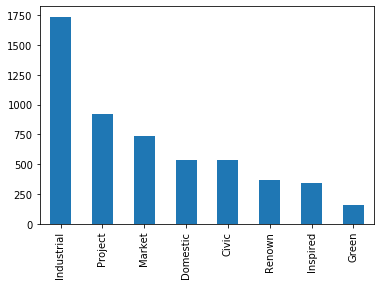

In [37]:
df['convention'].value_counts().plot(kind='bar')
plt.savefig('convention_training_data_proportions.png')

In [34]:
df['convention'].unique()

array(['Domestic', 'Civic', 'Project', 'Inspired', 'Green', 'Market',
       'Industrial', 'Renown'], dtype=object)